In [2]:
import torch

print("PyTorch version:", torch.__version__)
print("MPS disponible:", torch.backends.mps.is_available())
print("MPS construit:", torch.backends.mps.is_built())

if torch.backends.mps.is_available():
    device = torch.device("mps")
    x = torch.randn(1000, 1000).to(device)
    print("Test MPS réussi!")

PyTorch version: 2.8.0
MPS disponible: True
MPS construit: True
Test MPS réussi!


In [2]:
import torch
torch.backends.mps.is_available()
torch.backends.mps.is_built()  # Pour voir si MPS a été compilé

True

In [2]:
!python3 --version

Python 3.9.6


In [4]:
import tensorflow as tf
# import keras
import h5py
import numpy as np
import scipy

print("TensorFlow:", tf.__version__)
# print("Keras:", keras.__version__)
print("h5py:", h5py.__version__)
print("NumPy:", np.__version__)
print("SciPy:", scipy.__version__)


TensorFlow: 2.19.0
h5py: 3.13.0
NumPy: 2.0.2
SciPy: 1.13.1


In [1]:
from scipy import interpolate

def spline_up(x_lr, r):
    """ Interpolation par splines cubiques pour le pré-traitement"""
    x_lr = x_lr.flatten() # Assurez-vous que x_lr est un tableau 1D
    x_hr_len = len(x_lr) * r # r est le factor de sur-échantillonnage, le high-res sera r fois plus long que le low-res
    x_sp = np.zeros(x_hr_len) 
    i_lr = np.arange(x_hr_len, step=r) # Indices du low-res
    i_hr = np.arange(x_hr_len) # Indices du high-res, indices à interpoler
    f = interpolate.splrep(i_lr, x_lr)
    x_sp = interpolate.splev(i_hr, f) # Interpolation spline
    return x_sp

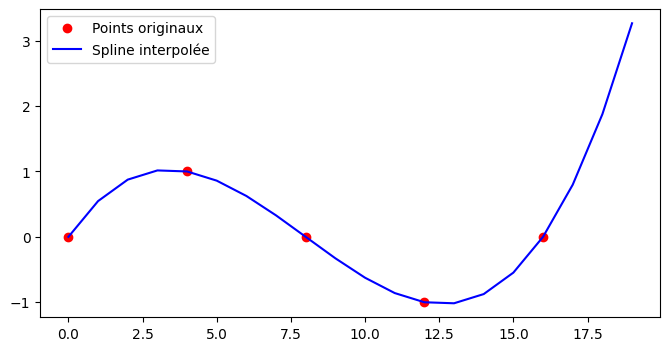

In [2]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Signal basse résolution
x_lr = np.array([0, 1, 0, -1, 0])  
r = 4

x_sp = spline_up(x_lr, r)

# Affichage
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(x_lr))*r, x_lr, "ro", label="Points originaux")
plt.plot(x_sp, "b-", label="Spline interpolée")
plt.legend()
plt.show()


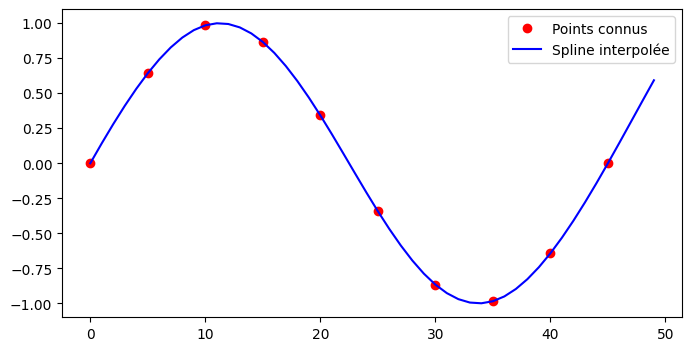

In [3]:
# Signal basse résolution : sinus
t = np.linspace(0, 2*np.pi, 10)
x_lr = np.sin(t)

x_sp = spline_up(x_lr, r=5)

plt.figure(figsize=(8,4))
plt.plot(np.arange(len(x_lr))*5, x_lr, "ro", label="Points connus")
plt.plot(x_sp, "b-", label="Spline interpolée")
plt.legend()
plt.show()

In [1]:
!pip install tensorflow-macos

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 1.2 MB/s  0:03:12m0:00:0100:05
Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.2 MB/s  0:00:04 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.2 MB/s  0:00:01 eta 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0━━ 0/7 [protobuf]
  Attempting uninstall: numpy━━━━━━━━━━━━━━━ 0/7 [protobuf]
    Found existing installation: numpy 2.0.2 0/7 [protobuf]
    Uninstalling numpy-2.0.2:90m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/7 [numpy]
      Successfully uninstalled numpy-2.0.2━━━━━━━━━━━━━━━━━━━━ 1/7 [numpy]
  Attempting uninstall: ml-dtypes━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━